In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt


True

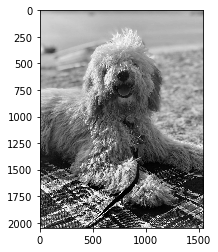

In [2]:
A = cv2.imread('dog.jpg', 1)
# I = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols, rgb = A.shape
I = np.ndarray(shape=(rows,cols), dtype='uint8', order='F')
for i in range(rows):
    for j in range(cols):
        I[i][j] = 0.299*A[i][j][0] + 0.587*A[i][j][1] + 0.114*A[i][j][2]
plt.imshow(I,"gray")
cv2.imwrite("I.jpg",I)

True

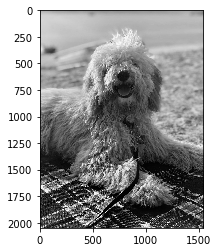

In [3]:
# I = cv2.imread('I.jpg', 0)
J = I.copy()
rows, cols = J.shape

# change this for different window size
window_size = 3
hl = int((window_size-1)/2)
left, right, top, bottom = 0,0,0,0
for i in range(rows):
    for j in range(cols):
        if i < hl:
            top, bottom = 0, i+hl
            if j < hl:
                left, right = 0, j+hl
            elif (cols-j) < hl:
                left, right = j-hl, cols
            else:
                left, right = j-hl, j+hl
        elif (rows - i) < hl:
            top, bottom = i-hl, rows
            if j < hl:
                left, right = 0, j+hl
            elif (cols-j) < hl:
                left, right = j-hl, cols
            else:
                left, right = j-hl, j+hl
        else:
            top,bottom = i-hl, i+hl
            if j < hl:
                left, right = 0, j+hl
            elif (cols-j) < hl:
                left, right = j-hl, cols
            else:
                left, right = j-hl, j+hl
        a = I[top:bottom, left:right]
        b = np.argmax(np.bincount(a.flat))
        J[i][j] = b
plt.imshow(J,'gray')
cv2.imwrite('J3.jpg',J)

True

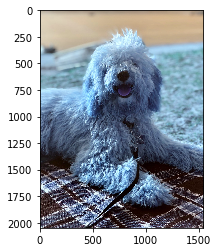

In [4]:
B = A.copy()
# temp = cv2.imread('J9.jpg', 0)
# J = temp.copy()
# rows, cols = J.shape

# change this for different window size
window_size = 3
hl = int((window_size-1)/2)
left, right, top, bottom = 0,0,0,0
for i in range(rows):
    for j in range(cols):
        if i < hl:
            top, bottom = 0, i+hl
            if j < hl:
                left, right = 0, j+hl
            elif (cols-j) < hl:
                left, right = j-hl, cols
            else:
                left, right = j-hl, j+hl
        elif (rows - i) < hl:
            top, bottom = i-hl, rows
            if j < hl:
                left, right = 0, j+hl
            elif (cols-j) < hl:
                left, right = j-hl, cols
            else:
                left, right = j-hl, j+hl
        else:
            top,bottom = i-hl, i+hl
            if j < hl:
                left, right = 0, j+hl
            elif (cols-j) < hl:
                left, right = j-hl, cols
            else:
                left, right = j-hl, j+hl
        a = J[top:bottom, left:right]
        b = np.argmax(np.bincount(a.flat))
        list_of_rows = []
        list_of_cols = []
        for m in range(bottom-top):
            for n in range(right-left):
                if J[top+m][left+n] == b:
                    list_of_rows.append(top+m)
                    list_of_cols.append(left+n)
        # change color band
        sum_r = 0
        sum_g = 0
        sum_b = 0
        for k in range(len(list_of_rows)):
            sum_r += A[list_of_rows[k]][list_of_cols[k]][0]
            sum_g += A[list_of_rows[k]][list_of_cols[k]][1]
            sum_b += A[list_of_rows[k]][list_of_cols[k]][2]
        B[i][j][0] = sum_r/len(list_of_rows)
        B[i][j][1] = sum_g/len(list_of_rows)
        B[i][j][2] = sum_b/len(list_of_rows)

plt.imshow(B,'gray')
cv2.imwrite('B3.jpg',B)